## 实验参考源码

In [6]:
column_name_zh = {
    1: "群名",
    2: "群类别",
    3: "群人数",
    4: "消息数",
    5: "稠密度",
    6: "性别比",
    7: "平均年龄",
    8: "年龄差",
    9: "地域集中度",
    10: "手机比例",
    11: "会话数",
    12: "无回应比例",
    13: "夜聊比例",
    14: "图片比例"
}
column_name_en = {
    1: "Group Name",
    2: "Group Category",
    3: "Group Size",
    4: "Message Count",
    5: "Density",
    6: "Sex Ratio",
    7: "Average Age",
    8: "Age Difference",
    9: "Regional Concentration",
    10: "Phone Ratio",
    11: "Conversation Count",
    12: "No Response Ratio",
    13: "Night Chat Ratio",
    14: "Picture Ratio"
}

### Task 3-A

#### 平均年龄的直接正态性检验

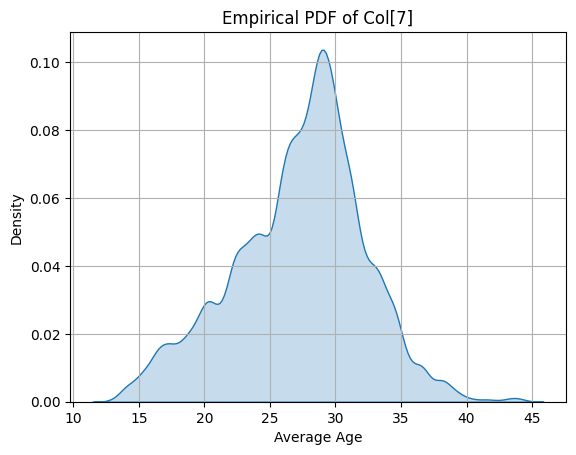

For Average Age: Statistic: 0.9883778242696424, p-value: 8.825739040912487e-12
平均年龄似乎不服从正态分布 (拒绝零假设)


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

data = pd.read_excel('data.xlsx')

# 提取第七列
col_7 = data.iloc[:, 6]  # Python索引从0开始，因此第七列是索引6

# 绘制经验概率密度函数
sns.kdeplot(col_7, bw_adjust=0.5,fill=True)
plt.title('Empirical PDF of Col[7]')
plt.xlabel('Average Age')
plt.ylabel('Density')
plt.grid()
plt.show()

# 正态性检验
statistic, p_value = stats.shapiro(col_7)  # 使用Shapiro-Wilk检验
print(f'For {column_name_en[7]}: Statistic: {statistic}, p-value: {p_value}')

# 根据p值判断正态性
alpha = 0.05
if p_value > alpha:
    print(f"{column_name_zh[7]}似乎服从正态分布 (不能拒绝零假设)")
else:
    print(f"{column_name_zh[7]}似乎不服从正态分布 (拒绝零假设)")


### Task 3-B

#### 基于不同标签下的平均年龄正态性检验

In [17]:
average_age_by_category = [data.loc[data.iloc[:, 1] == i, data.columns[6]] for i in range(1, 6)]
for i, group_data in enumerate(average_age_by_category, start=1):
    shapiro_result = stats.shapiro(group_data)
    print(f'For {column_name_en[7]} based on Catogray {i}: Statistic: {statistic}, p-value: {p_value}')
    if shapiro_result.pvalue < 0.05:
        print(f"类别{i}的{column_name_zh[7]}似乎不服从正态分布")
    else:
        print(f"类别{i}的{column_name_zh[7]}似乎服从正态分布")

For Average Age based on Catogray 1: Statistic: 0.9883778242696424, p-value: 8.825739040912487e-12
类别1的平均年龄似乎不服从正态分布
For Average Age based on Catogray 2: Statistic: 0.9883778242696424, p-value: 8.825739040912487e-12
类别2的平均年龄似乎不服从正态分布
For Average Age based on Catogray 3: Statistic: 0.9883778242696424, p-value: 8.825739040912487e-12
类别3的平均年龄似乎服从正态分布
For Average Age based on Catogray 4: Statistic: 0.9883778242696424, p-value: 8.825739040912487e-12
类别4的平均年龄似乎不服从正态分布
For Average Age based on Catogray 5: Statistic: 0.9883778242696424, p-value: 8.825739040912487e-12
类别5的平均年龄似乎不服从正态分布


#### 各类别下的方差齐次性检验

In [18]:
levene_test_result = stats.levene(*average_age_by_category)
print(f'Levene Test: Statistic: {levene_test_result.statistic}, p-value: {levene_test_result.pvalue}')
if levene_test_result.pvalue < 0.05:
    print(f"{column_name_zh[7]}在各类别之间似乎不具备方差齐性")
else:
    print(f"{column_name_zh[7]}在各类别之间似乎具备方差齐性")

Levene Test: Statistic: 61.01927977094263, p-value: 9.677355333795493e-49
平均年龄在各类别之间似乎不具备方差齐性


#### Task 3-C

One-Way ANOVA Test Results:
                        df        sum_sq      mean_sq           F  \
C(data.iloc[:, 1])     4.0  12782.918190  3195.729547  171.507033   
Residual            2035.0  37918.617834    18.633227         NaN   

                           PR(>F)  
C(data.iloc[:, 1])  1.082092e-126  
Residual                      NaN  
结论：不同类别之间的平均年龄存在显著差异（拒绝零假设）。


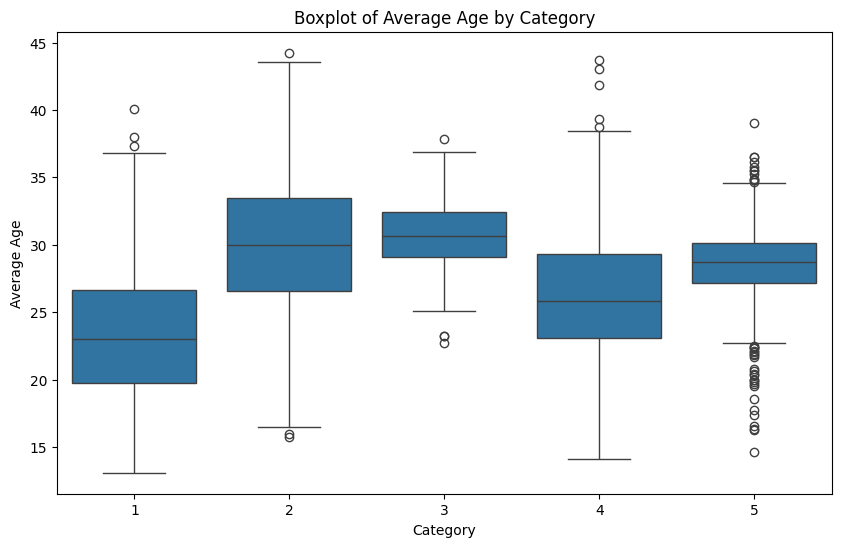

In [21]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# 使用ols模型进行ANOVA分析
model = ols('data.iloc[:, 6] ~ C(data.iloc[:, 1])', data=data).fit()
anova_result = anova_lm(model)

# 输出ANOVA结果
print("One-Way ANOVA Test Results:")
print(anova_result)

# 检查p值，判断是否拒绝零假设
if anova_result['PR(>F)'].iloc[0] < 0.05:
    print("结论：不同类别之间的平均年龄存在显著差异（拒绝零假设）。")
else:
    print("结论：不同类别之间的平均年龄没有显著差异（无法拒绝零假设）。")

plt.figure(figsize=(10, 6))
sns.boxplot(x=data.iloc[:, 1], y=data.iloc[:, 6]) 
plt.title("Boxplot of Average Age by Category")
plt.xlabel("Category")
plt.ylabel("Average Age")
plt.show()

### Task 4

For Group Size: Statistic: 0.5954354292479507, p-value: 2.89078854164048e-56
群人数不服从正态分布
群人数的对数变换不服从正态分布


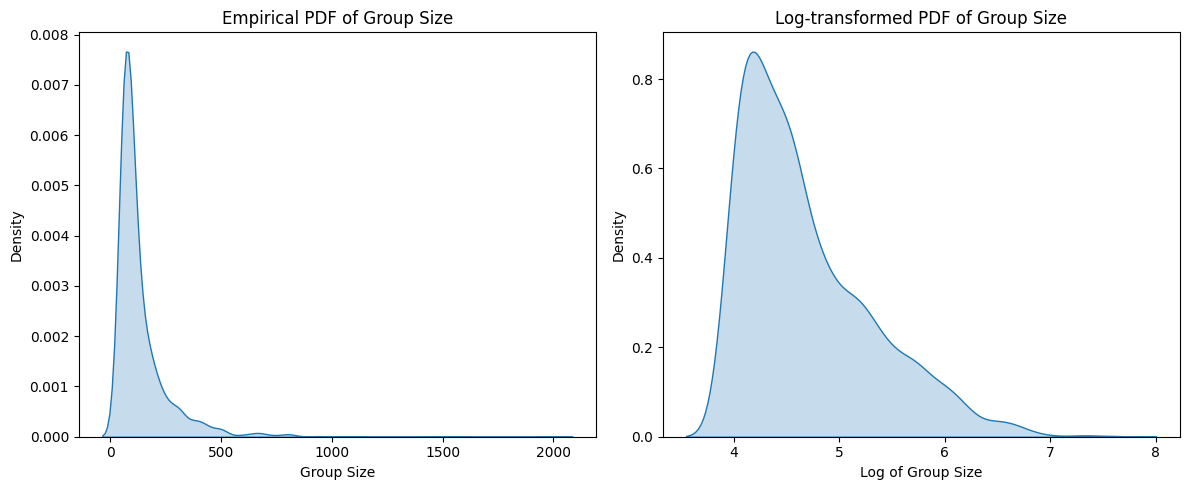

--------------------------------------------
For Message Count: Statistic: 0.19944335254138434, p-value: 7.386284996138098e-69
消息数不服从正态分布
消息数的对数变换不服从正态分布


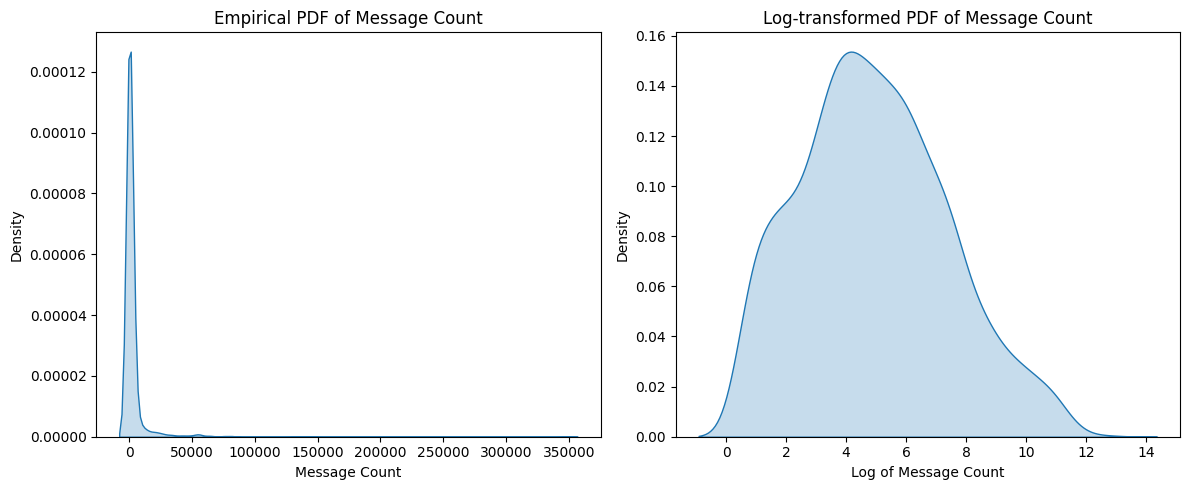

--------------------------------------------
For Sex Ratio: Statistic: 0.9700647855544581, p-value: 3.340881084764461e-20
性别比不服从正态分布
性别比的对数变换不服从正态分布


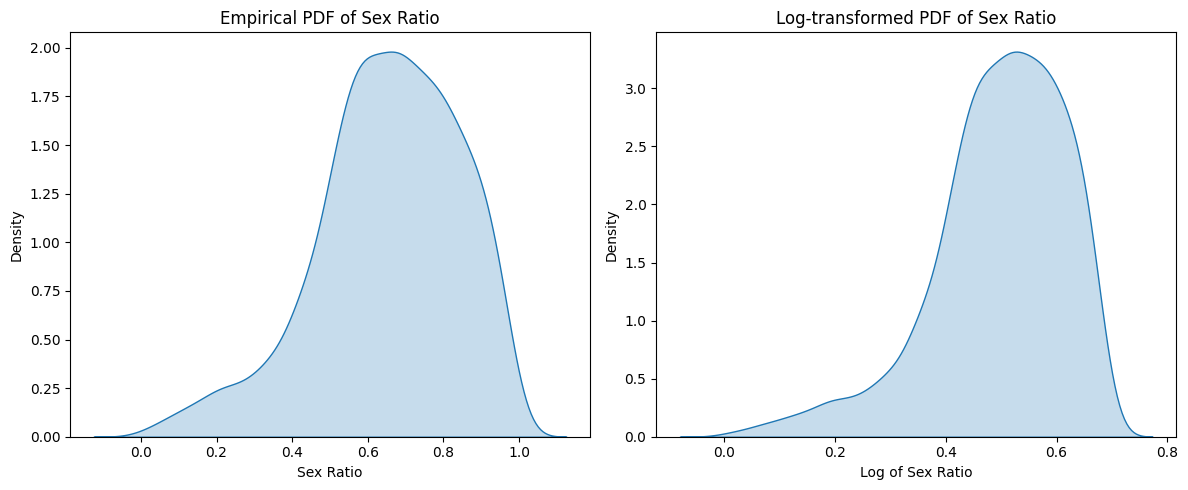

--------------------------------------------


In [30]:
columns_to_analyze = [2, 3, 5]  # 假设选择第3、4、5列, 分别对应群人数、消息数、性别比
for col_index in columns_to_analyze:
    col_name_zh = column_name_zh[col_index+1]
    col_name_en = column_name_en[col_index+1]
    col_data = data.iloc[:, col_index]

    # 1. 正态性检验
    normality_result = stats.shapiro(col_data)
    print(f'For {col_name_en}: Statistic: {normality_result.statistic}, p-value: {normality_result.pvalue}')
    if normality_result.pvalue < 0.05:
        print(f"{col_name_zh}不服从正态分布")
    else:
        print(f"{col_name_zh}服从正态分布")

    # 2. 对数变换后的正态性检验
    log_data = np.log(col_data + 1)  # 为避免log(0)，加1处理
    log_normality_result = stats.shapiro(log_data)
    if log_normality_result.pvalue < 0.05:
        print(f"{col_name_zh}的对数变换不服从正态分布")
    else:
        print(f"{col_name_zh}的对数变换服从正态分布")
    
    # 3. 绘制对数变换前后pdf
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.kdeplot(col_data, fill=True, ax=axes[0])
    axes[0].set_title(f'Empirical PDF of {col_name_en}')
    axes[0].set_xlabel(col_name_en)

    sns.kdeplot(log_data, fill=True, ax=axes[1])
    axes[1].set_title(f'Log-transformed PDF of {col_name_en}')
    axes[1].set_xlabel(f'Log of {col_name_en}')

    plt.tight_layout() 
    plt.show()
    print("--------------------------------------------")

### Task 5-B

Kruskal-Wallis H检验结果:
KruskalResult(statistic=np.float64(4080.477517381482), pvalue=np.float64(0.0))
结论：对数变换后的三个特征列之间存在显著差异（拒绝零假设）。


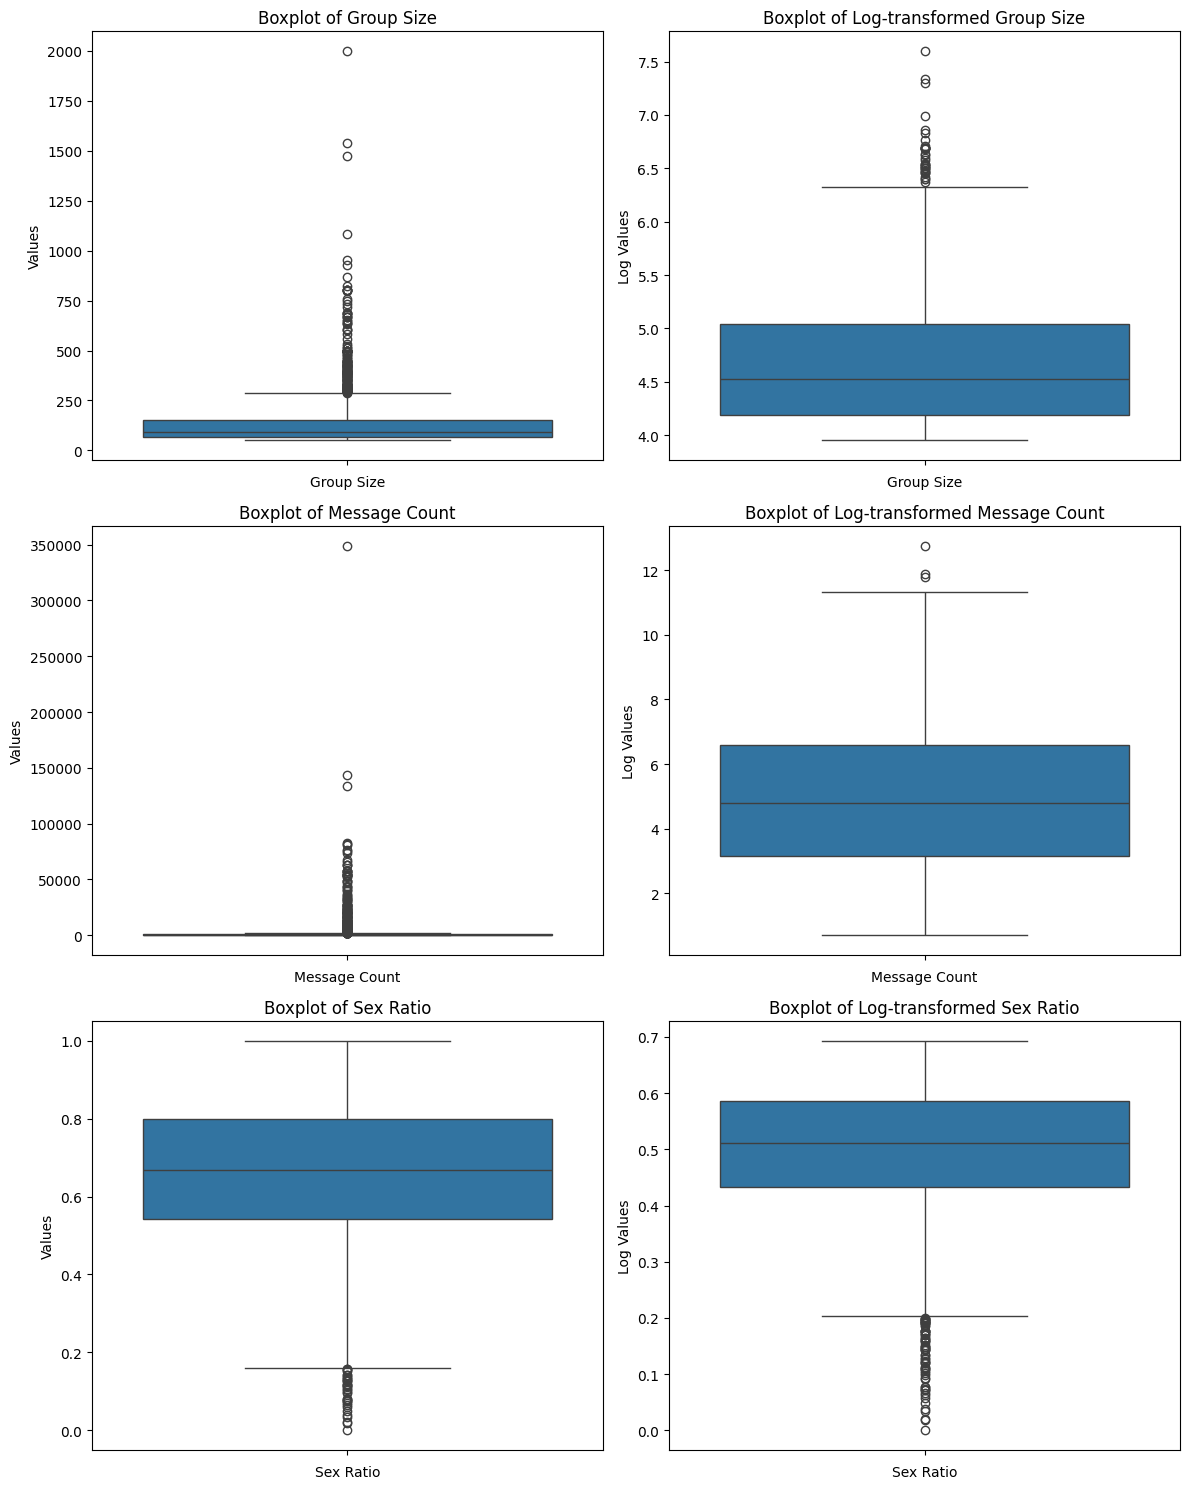

In [35]:
# 在上个任务基础上，继续选用群人数、消息数、性别比进行非参数检验

column_data = []
log_column_data = []
column_names_zh = []
column_names_en = []

for col_index in columns_to_analyze:
    col_name_zh = column_name_zh[col_index+1]  
    col_name_en = column_name_en[col_index+1]  
    col_data = data.iloc[:, col_index]

    column_data.append(col_data)
    log_column_data.append(np.log(col_data + 1))
    column_names_zh.append(col_name_zh)
    column_names_en.append(col_name_en)

# 1. Kruskal-Wallis H检验
kruskal_result = stats.kruskal(*log_column_data)
print("Kruskal-Wallis H检验结果:")
print(kruskal_result)

# 2. 检验结果的解释
if kruskal_result.pvalue < 0.05:
    print("结论：对数变换后的三个特征列之间存在显著差异（拒绝零假设）。")
else:
    print("结论：对数变换后的三个特征列之间不存在显著差异（无法拒绝零假设）。")

# 3. 可视化结果：分开绘制每列的原始数据和对数变换后的数据，并组合到一个图表中
fig, axes = plt.subplots(3, 2, figsize=(12, 15))

for i, col_index in enumerate(columns_to_analyze):
    col_name_zh = column_names_zh[i]
    col_name_en = column_names_en[i]
    original_data = column_data[i]
    log_data = log_column_data[i]

    sns.boxplot(y=original_data, ax=axes[i, 0])
    axes[i, 0].set_title(f'Boxplot of {col_name_en}')
    axes[i, 0].set_ylabel('Values')
    axes[i, 0].set_xlabel(col_name_en)

    sns.boxplot(y=log_data, ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of Log-transformed {col_name_en}')
    axes[i, 1].set_ylabel('Log Values')
    axes[i, 1].set_xlabel(col_name_en)

plt.tight_layout()
plt.show()

In [37]:
from PIL import Image

def concatenate_images_vertically(image_paths, output_path="combined_image.png"):
    
    images = [Image.open(img_path) for img_path in image_paths]
    widths, heights = zip(*(img.size for img in images))
    total_height = sum(heights)
    max_width = max(widths)
    
    combined_image = Image.new("RGB", (max_width, total_height), color="white")
    
    y_offset = 0
    for img in images:
        combined_image.paste(img, (0, y_offset))
        y_offset += img.height
    
    combined_image.save(output_path)
    print(f"Combined image saved as {output_path}")

image_paths = ["latex/image/output3-1.png", "latex/image/output3-2.png", "latex/image/output3-3.png"]
concatenate_images_vertically(image_paths, "latex/image/output3.png")

Combined image saved as latex/image/output3.png
